# **Remote Work Burnout Analysis and Prediction**

Analyzing working from home factors and predicting burnout levels
using machine learning

# **Loading Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [6]:
#Load the dataset
df = pd.read_csv('work_from_home_burnout_dataset.csv')

In [8]:
#Display the first few rows
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   user_id day_type  ...  burnout_score  burnout_risk
0        1  Weekday  ...          19.17           Low
1        1  Weekend  ...          29.70           Low
2        1  Weekend  ...          32.93           Low
3        1  Weekday  ...          45.47           Low
4        1  Weekend  ...          51.61           Low

[5 rows x 11 columns]


# **Exploratory Data Analysis**

In [10]:
#check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1800 non-null   int64  
 1   day_type              1800 non-null   object 
 2   work_hours            1800 non-null   float64
 3   screen_time_hours     1800 non-null   float64
 4   meetings_count        1800 non-null   int64  
 5   breaks_taken          1800 non-null   int64  
 6   after_hours_work      1800 non-null   int64  
 7   sleep_hours           1800 non-null   float64
 8   task_completion_rate  1800 non-null   float64
 9   burnout_score         1800 non-null   float64
 10  burnout_risk          1800 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 154.8+ KB
None


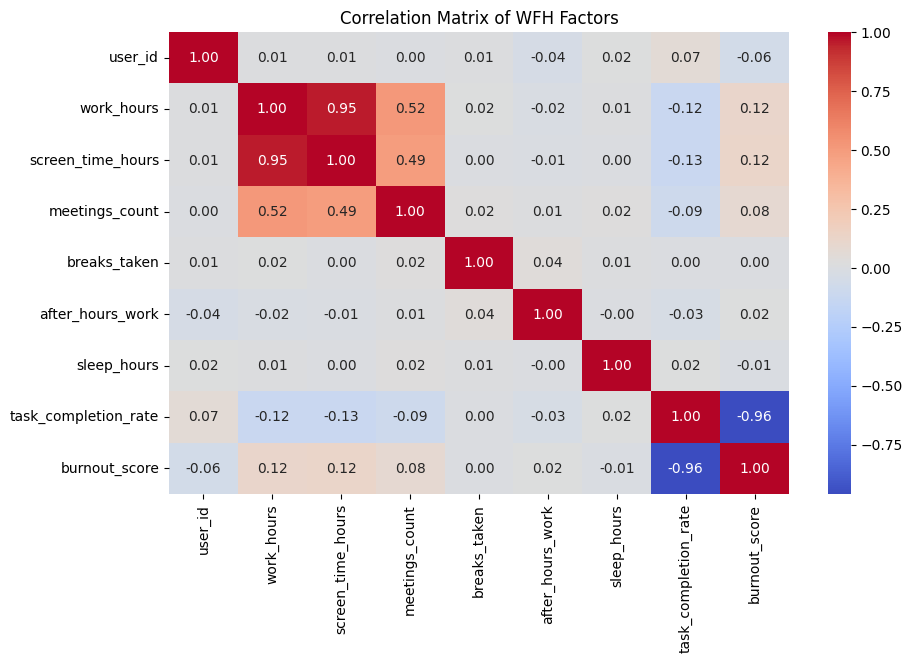

In [13]:
#visualizing the corellation between features
plt.figure(figsize=(10 , 6))
sns.heatmap(df.corr(numeric_only=True) , annot= True ,cmap = 'coolwarm',
fmt=".2f")
plt.title('Correlation Matrix of WFH Factors')
plt.show()

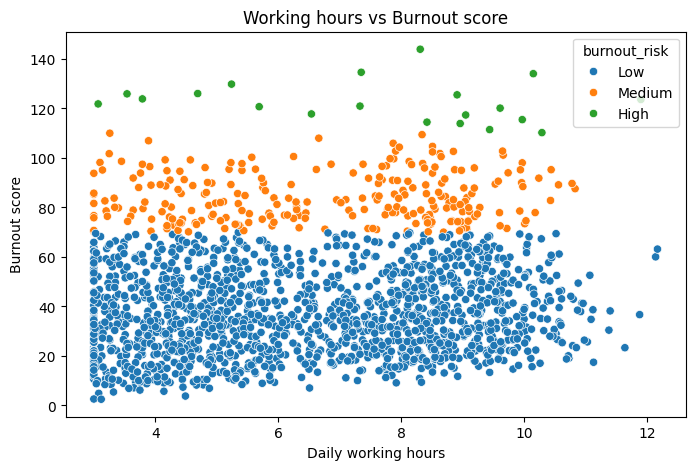

In [16]:
#Relationship between work hours and burnout score
plt.figure(figsize=(8,5))
sns.scatterplot(data=df , x='work_hours' , y='burnout_score' ,
                hue='burnout_risk')
plt.title('Working hours vs Burnout score')
plt.xlabel('Daily working hours')
plt.ylabel('Burnout score')
plt.show()

# Data Processing

In [19]:
#Encoding categorial variables
le = LabelEncoder()
df['day_type_encoded'] = le.fit_transform(df['day_type'])
#Selecting features for the model
features = ['day_type_encoded', 'work_hours', 'screen_time_hours',
            'meetings_count', 'breaks_taken', 'after_hours_work',
            'sleep_hours', 'task_completion_rate']
x=df[features]
y=df['burnout_score']

In [22]:
#Spliting the data into training and testing sets
X_train , X_test , y_train , y_test = train_test_split(x, y ,test_size=0.2 ,
                                                        random_state= 42)

# **Machine Learning Model (Random Forest)**

In [24]:
#Initialize and Train the model
model = RandomForestRegressor(n_estimators=100 , random_state=42)
model.fit(X_train , y_train)
#Making predictions
y_pred = model.predict(X_test)
#Evaluating the model
mse=mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)
print(f"Mean squared error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean squared error: 37.21
R-squared: 0.93


# **Feature Importance**

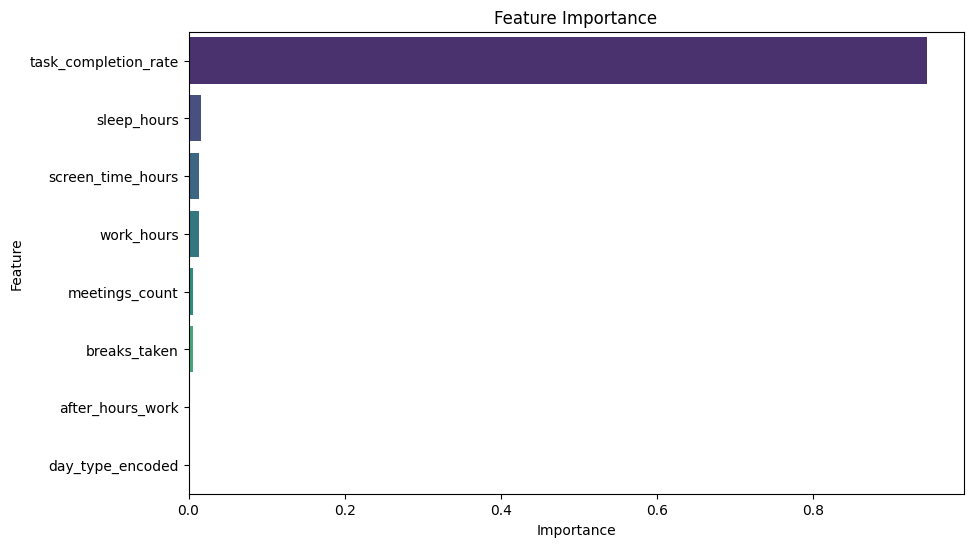

In [29]:
#Visualizing which factors contribute most to burnout
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature':features ,
                                      'Importance':importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature' ,data = feature_importance_df,
            hue='Feature', legend=False, palette='viridis')
plt.title('Feature Importance')
plt.show()

# **Conclusion**
Primary predictors : variables like working hours and screen time hours typically show the highest importance, suggesting that workload volume is the leading cause of stress.

Recovery Factors : spleep hours and breaks taken act as critical balancing factors.The model relies heavily on this determine if a user can sustain their productivity without burning out.

Efficiency vs Stress : the task completion rate helps the model distinguish between high-performers and those struggling with burnout-induced procrastination

**Conclusion: To reduce burnout risk, interventions should focus on limiting screen time and encouraging more frequent breaks, rather than just adjusting the type of day worked**